# Supervised Learning Use Case: Predicting Presence of Cancer

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn 
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import linear_model
from sklearn import preprocessing
np.set_printoptions(suppress=True)
from IPython.display import display
pd.options.display.float_format = '{:.3f}'.format

#### References:
1. Feature selection for regularization algorithms(?): https://stats.stackexchange.com/questions/149446/do-we-still-need-to-do-feature-selection-while-using-regularization-algorithms

2. Approach to oversampling
3. How to use Kbest https://www.quora.com/How-do-I-properly-use-SelectKBest-GridSearchCV-and-cross-validation-in-the-sklearn-package-together
4. Pipelines for more efficient code: https://www.civisanalytics.com/blog/workflows-in-python-using-pipeline-and-gridsearchcv-for-more-compact-and-comprehensive-code/
5. Model Tuning: http://chenstephen.com/post_model_tuning.html
6. Grid Search across multiple classifiers: http://www.codiply.com/blog/hyperparameter-grid-search-across-multiple-models-in-scikit-learn/
7. How to think through feature selection: https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2
8. Workflows with Scikit-learn pipelines -- working with multiple models, pipelines, and gridsearches: https://www.kdnuggets.com/2018/01/managing-machine-learning-workflows-scikit-learn-pipelines-part-3.html

#### Steps completed:
1. Read in data
2. Remove null values, address NA values (not an issue with this dataset)
3. Feature selection (?)
4. Normalize data
5. Split data
6. Test with logistic regression

#### Next steps:
1. Fix class imbalance 
2. Select k best, feature selection, PCA for dimensionality reduction
3. Test with remaining algorithims (perform gridsearchCV to parameter optimization), cross validation 

***Check github again***

## Read in Data

In [3]:
# Read in data
df = pd.read_csv('bc_data.csv')

In [4]:
# Preview Data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,...,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,nan
1,842517,M,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,...,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,nan
2,84300903,M,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,...,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,nan
3,84348301,M,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,...,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,nan
4,84358402,M,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,...,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,nan


In [5]:
# Evaluate missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# Drop unnecessary columns
df.drop(['Unnamed: 32',"id"],axis=1,inplace=True)

In [7]:
# Convert diagnosis categories into numeric values for analysis 
diagnosis_vals = {"diagnosis": {"B":0, "M":1}}
df.replace(diagnosis_vals,inplace=True)

In [8]:
# Normalize data 
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled,columns=df.columns)
df_normalized.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.000,0.521,0.023,0.546,0.364,0.594,0.792,0.703,0.731,0.686,...,0.621,0.142,0.668,0.451,0.601,0.619,0.569,0.912,0.598,0.419
1,1.000,0.643,0.273,0.616,0.502,0.290,0.182,0.204,0.349,0.380,...,0.607,0.304,0.540,0.435,0.348,0.155,0.193,0.639,0.234,0.223
2,1.000,0.601,0.390,0.596,0.449,0.514,0.431,0.463,0.636,0.510,...,0.556,0.360,0.508,0.375,0.484,0.385,0.360,0.835,0.404,0.213
3,1.000,0.210,0.361,0.234,0.103,0.811,0.811,0.566,0.523,0.776,...,0.248,0.386,0.241,0.094,0.915,0.814,0.549,0.885,1.000,0.774
4,1.000,0.630,0.157,0.631,0.489,0.430,0.348,0.464,0.518,0.378,...,0.520,0.124,0.507,0.342,0.437,0.172,0.319,0.558,0.158,0.143


In [9]:
# Evaluate class balance
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## Feature Selection / Examining Feature Importance

In [10]:
# Split dataset into training and testing subsets
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

### Chi2

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [12]:
len(X.columns)

30

In [13]:
kbest = SelectKBest(chi2)
pipeline = Pipeline([('kbest', kbest), ('lr', LogisticRegression())])
grid_search = GridSearchCV(pipeline, {'kbest__k': list(range(1,31,3)), 'lr__C': np.logspace(-10, 10, 5)})
grid_search.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kbest', SelectKBest(k=10, score_func=<function chi2 at 0x1c1d8bfa60>)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kbest__k': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28], 'lr__C': array([  1.00000e-10,   1.00000e-05,   1.00000e+00,   1.00000e+05,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
grid_search.best_params_

{'kbest__k': 22, 'lr__C': 10000000000.0}

In [15]:
from sklearn.feature_selection import chi2
selector = SelectKBest(chi2,k=5)
selector.fit(X,y)
mask = selector.get_support(indices=True)
chi2_features = X.columns[mask]

In [16]:
chi2_features

Index(['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
       'area_worst'],
      dtype='object')

### Anova F-value

In [17]:
from sklearn.feature_selection import f_classif
selector = SelectKBest(f_classif,k=5)
selector.fit(X,y)
mask = selector.get_support(indices=True)
fval_features = X.columns[mask]

In [18]:
fval_features

Index(['perimeter_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'concave points_worst'],
      dtype='object')

### Mutual Information

In [19]:
from sklearn.feature_selection import mutual_info_classif
selector = SelectKBest(mutual_info_classif,k=5)
selector.fit(X,y)
mask = selector.get_support(indices=True)
mutualinfo_features = X.columns[mask]

In [20]:
mutualinfo_features

Index(['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

### PCA

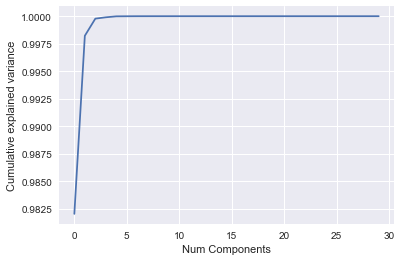

In [21]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Num Components')
plt.ylabel('Cumulative explained variance')

In [22]:
pca.explained_variance_ratio_

array([ 0.98204467,  0.01617649,  0.00155751,  0.00012093,  0.00008827,
        0.00000665,  0.00000402,  0.00000082,  0.00000034,  0.00000019,
        0.00000007,  0.00000002,  0.00000001,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [23]:
components = 1

## Model

In [24]:
# Oversample data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)

X, y = sm.fit_sample(X, y)

# Split dataset into training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=12)

# Verify that data are resampled
print("Verify balanced classes:",np.unique(y,return_counts=True))

Verify balanced classes: (array([0, 1]), array([357, 357]))


In [27]:
# Establish number of features to test each time during grid search
features = list(range(1,len(df.columns),3))

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
import time

kbest = SelectKBest(chi2)
pipeline = Pipeline([('kbest', kbest), ('lr', LogisticRegression())])
grid_search = GridSearchCV(pipeline, {'kbest__k': list(range(1,31,3)), 'lr__C': np.logspace(-10, 10, 5)})
grid_search.fit(X, y)

# Construct some pipelines
pipe_lr = Pipeline([('kbest', kbest),
            ('scl', StandardScaler()),
            ('clf', LogisticRegression(random_state=42))])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=components)),
            ('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('kbest', kbest),
            ('scl', StandardScaler()),
            ('clf', RandomForestClassifier(random_state=42))])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=components)),
            ('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('kbest', kbest),
            ('scl', StandardScaler()),
            ('clf', svm.SVC(random_state=42))])

pipe_svm_pca = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=components)),
            ('clf', svm.SVC(random_state=42))])

pipe_knn = Pipeline([('kbest', kbest),
                    ('scl',StandardScaler()),
                    ('clf',KNeighborsClassifier())])

pipe_knn_pca = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=components)),
            ('clf', KNeighborsClassifier())])

pipe_nb = Pipeline([('kbest', kbest),
            ('scl', StandardScaler()),
            ('clf', BernoulliNB())])

pipe_nb_pca = Pipeline([('scl', StandardScaler()),
            ('clf', BernoulliNB())])

# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'kbest__k': features,
        'clf__penalty': ['l1', 'l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['liblinear']}] 

grid_params_lr_pca = [{'clf__penalty': ['l1', 'l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['liblinear']}] 

grid_params_rf = [{'kbest__k': features,
        'clf__criterion': ['gini', 'entropy'],
        'clf__min_samples_leaf': param_range,
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]

grid_params_rf_pca = [{'clf__criterion': ['gini', 'entropy'],
        'clf__min_samples_leaf': param_range,
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'kbest__k': features,
        'clf__kernel': ['linear', 'rbf'], 
        'clf__C': param_range}]

grid_params_svm_pca = [{'clf__kernel': ['linear', 'rbf'], 
        'clf__C': param_range}]

grid_params_knn = [{
        'kbest__k': features,
        'clf__n_neighbors': [1,2,3,4,5,6,7,8,9,10], 
        'clf__weights': ['uniform','distance'],
        'clf__algorithm':['ball_tree','brute','auto'],
        'clf__leaf_size':[10,20,30,40,50,60,70,80,90,100]}]

grid_params_knn_pca = [{'clf__n_neighbors': [1,2,3,4,5,6,7,8,9,10], 
        'clf__weights': ['uniform','distance'],
        'clf__algorithm':['ball_tree','brute','auto'],
        'clf__leaf_size':[10,20,30,40,50,60,70,80,90,100]}]

grid_params_nb = [{'kbest__k':features,
                   'clf__alpha': param_range_fl}]

grid_params_nb_pca = [{'clf__alpha': param_range_fl}]


# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='accuracy',
            cv=10) 

gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
            param_grid=grid_params_lr_pca,
            scoring='accuracy',
            cv=10)

gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='accuracy',
            cv=10, 
            n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
            param_grid=grid_params_rf_pca,
            scoring='accuracy',
            cv=10, 
            n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
            param_grid=grid_params_svm_pca,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)

gs_knn = GridSearchCV(estimator=pipe_knn,
            param_grid=grid_params_knn,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)

gs_knn_pca = GridSearchCV(estimator=pipe_knn_pca,
            param_grid=grid_params_knn_pca,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)

gs_nb = GridSearchCV(estimator=pipe_nb,
            param_grid=grid_params_nb,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)

gs_nb_pca = GridSearchCV(estimator=pipe_nb_pca,
            param_grid=grid_params_nb_pca,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)



# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca, gs_svm, gs_svm_pca,gs_knn,gs_knn_pca,gs_nb,gs_nb_pca]


# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
        2: 'Random Forest', 3: 'Random Forest w/PCA', 
        4: 'Support Vector Machine', 5: 'Support Vector Machine w/PCA', 6: 'K Nearest Neighbors',
            7: 'K Nearest Neighbors w/ PCA', 8: 'Naive Bayes',
            9: 'Naive Bayes w/ PCA'}
    


In [30]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

# Save best grid search pipeline to file
dump_file = 'best_gs_pipeline.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear', 'kbest__k': 22}
Best training accuracy: 0.973
Test set accuracy score for best params: 0.975 

Estimator: Logistic Regression w/PCA
Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.914
Test set accuracy score for best params: 0.924 

Estimator: Random Forest
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 8, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 6, 'kbest__k': 28}
Best training accuracy: 0.971
Test set accuracy score for best params: 0.966 

Estimator: Random Forest w/PCA
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 1, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best training accuracy: 0.916
Test set accuracy score for best params: 0.932 

Estimator: Support Vector Machine
Best params: {'clf__C': 5, 'clf__kernel': 'rbf', 'kbest__k': 2